# Dataset Description

## awards_players

- playerId
- award (should standardize and abreviate)
- Lg ID (remove)
- year

## coaches

- lgId (remove)
- Stint (timeperiod coach was at the team) (use to convert years)
- Post_wins e Post_loses (playoff wins, irrelevant, remove)
  
## players_teams

- Stint (timeperiod player was in the team)
- lgId (remove)
- GP (games played)
- GS (game started)
- ORebounds (offensive rebounds)
- DRebounds (defensive rebounds)
- rebounds (total) (check sum of previous 2)
- turnovers (negative stat)
- PF (Personal Fouls)
- Fg Attempted (field goals attempted)
- Fg Made (maybe change to ratio)
- Ft (free throws)
- Dq (desqualify)
- Post ... (maybe ignore)

## Players

- POS (postion, has missing value) (Center, Forward-Center, Guard, Forward-Guard) (check if multiple positions over time)
- firstseason e lastseason (remove)
- height (missing values) (check if same units)
- college (some missing values, some none)
- death date (ignore dead players)

## series and teams post
- ignore files, reffering to the season after playoffs qualification  

## teams

- TmId (team Id), Franch ID (Franchise Id) (maybe irrelevant, maybe not)
- DivId (remove, all empty)
- Rank (maybe seed)
- Seeded (remove)
- **Playoff** (N, Y) to predict next
- first round, semis, finals (change to one column that has numbers that relate to when they got eliminated) (label0-no playoffs, label1-loss on first round, label2-loss on semis, label3-loss on finals, label4-no losses)
- Name (already have ID, may not be necessary)
- O_fgm (offensive field goals made)
- O_fga (offensive field goals attempted)
- Tm ORB, Tm DRB, Tm TRB ,Oppmt ORS, Oppmt DRB, Oppmt TRB (all 0, remove)
- GP (all teams play all games, maybe remove column)
- Win Loss -> create ratio
- Conf W L (maybe irrelevent)
- Attend (number of spectators, maybe irrelevant)
- Arena (remove)


# Developments

## players_teams

(All this was changed via python)
- Got per games for main statistical categories (Points, Assists, Rebounds (Off and Def), Steals, Blocks, Turnovers, Personal Fouls)
- Got percentages for main shots (Field Goals, Free Throws, Three Pointers)
- Removed League ID
- Created File with and without Post Season Performance
- Set all missing values to 0

![Alt text](prntscrns/ptms.png)


## awards_players

(All this was changed via python)
- Removed League ID
- Fixed an incorrectly inputted value (Kim Perrot Sportmanship -> Kim Perrot Sportmanship Award)
- Abbreviated the award names to a standard (Capitalized and First Letters Only)

![Alt text](prntscrns/awrds.png)


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# teams_post data exploration and processing

In [54]:
# TEAMS POST
# remove Lg ID
# check for missing values and abnormal data

teams_post = pd.read_csv("dataset/teams_post.csv")
teams_post.drop(columns=['lgID'], inplace=True)

missing_values = teams_post.isna().sum().sum()
print(f"Missing values: {missing_values}")

Missing values: 0


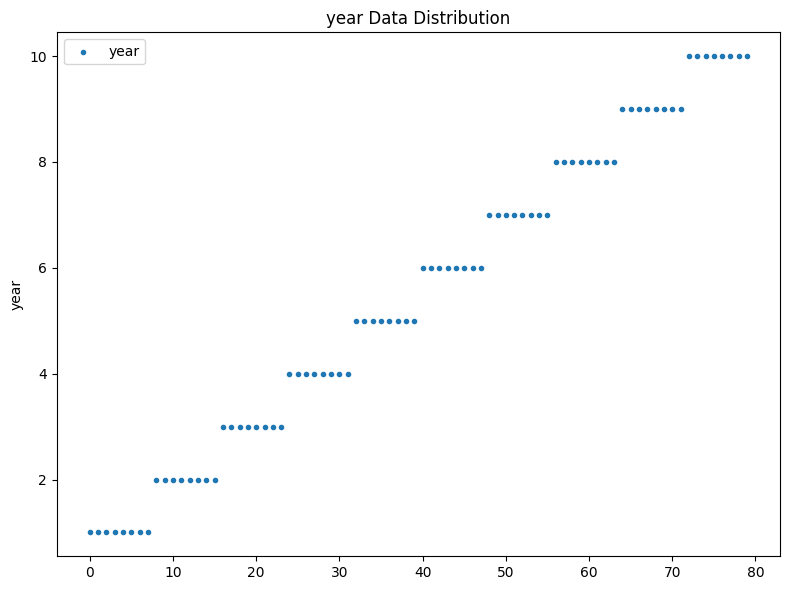

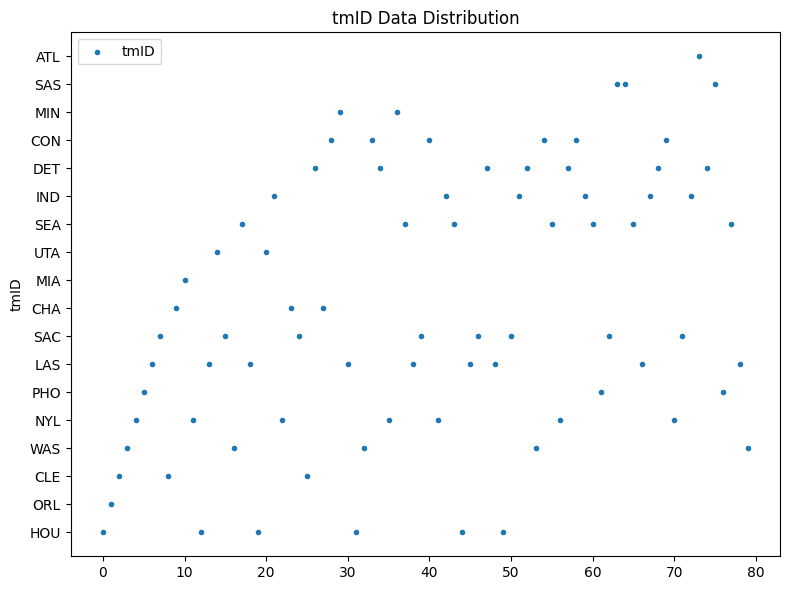

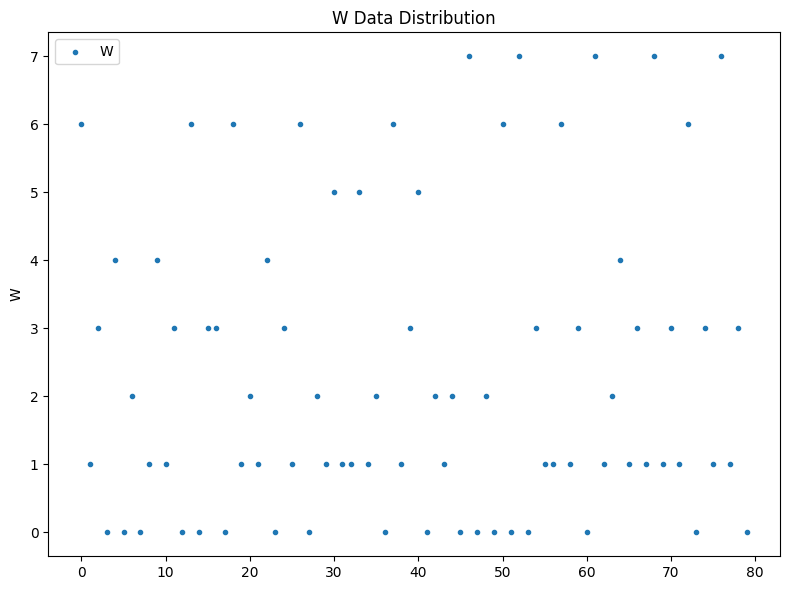

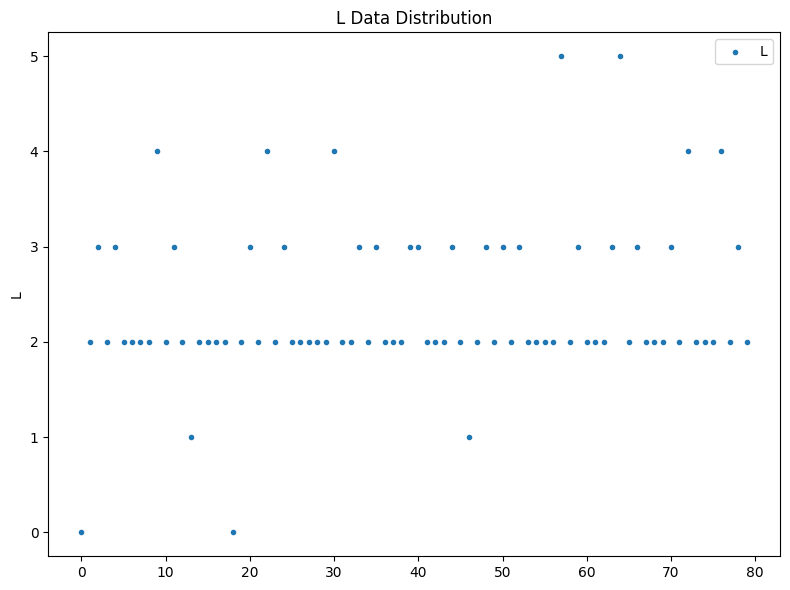

In [55]:
for column in teams_post.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(teams_post)), teams_post[column], marker='.', label=column)
    plt.title(f'{column} Data Distribution')
    plt.ylabel(column)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [56]:
teams_post.to_csv('dataset_edited/teams_post.csv', index=False)

# coaches data exploration and processing

In [57]:
# Coaches
# remove Lg ID
# check for missing values and abnormal data
# crate win/loss ratios

coaches = pd.read_csv("dataset/coaches.csv")
coaches.drop(columns=['lgID'], inplace=True)

#remove post data
coaches.drop(columns=['post_wins', 'post_losses'], inplace=True)

missing_values = teams_post.isna().sum().sum()
print(f"Missing values: {missing_values}")

Missing values: 0


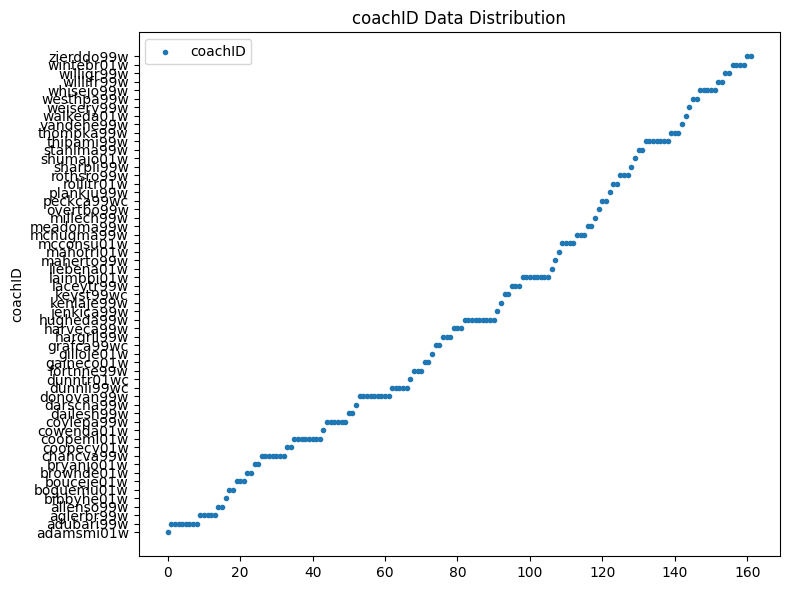

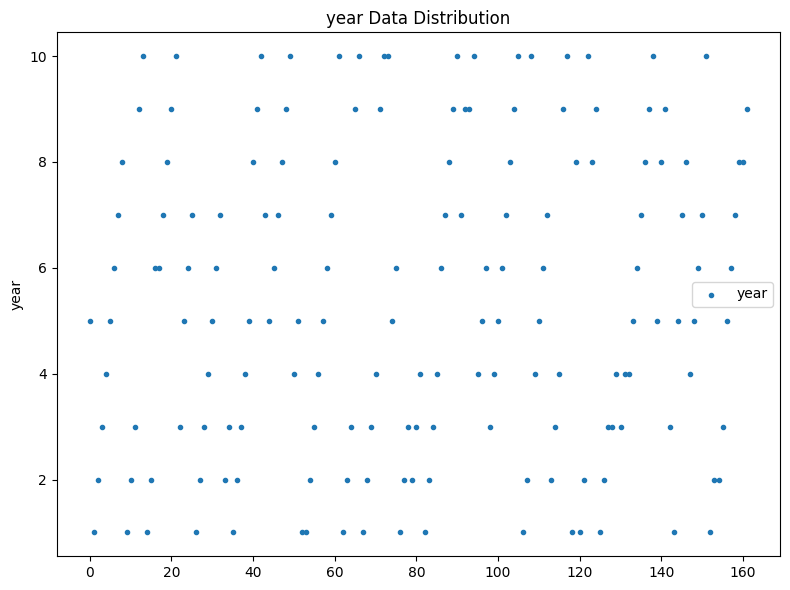

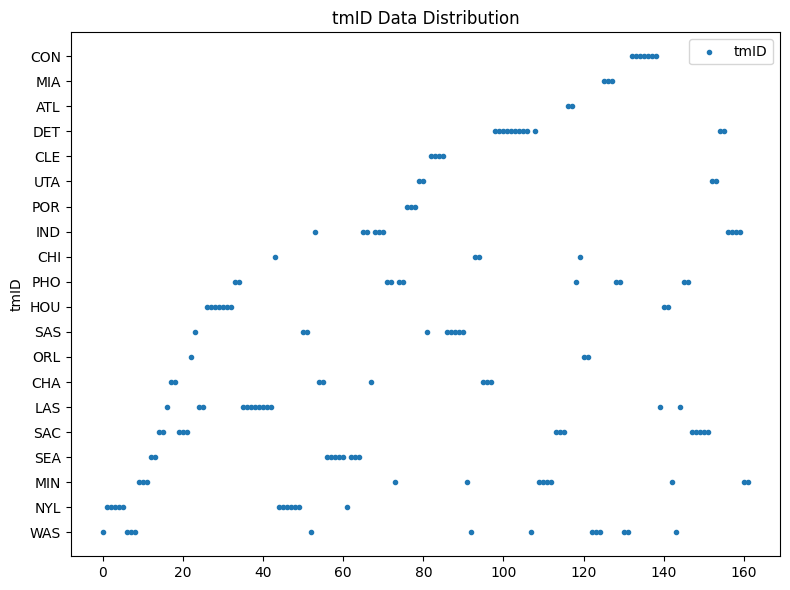

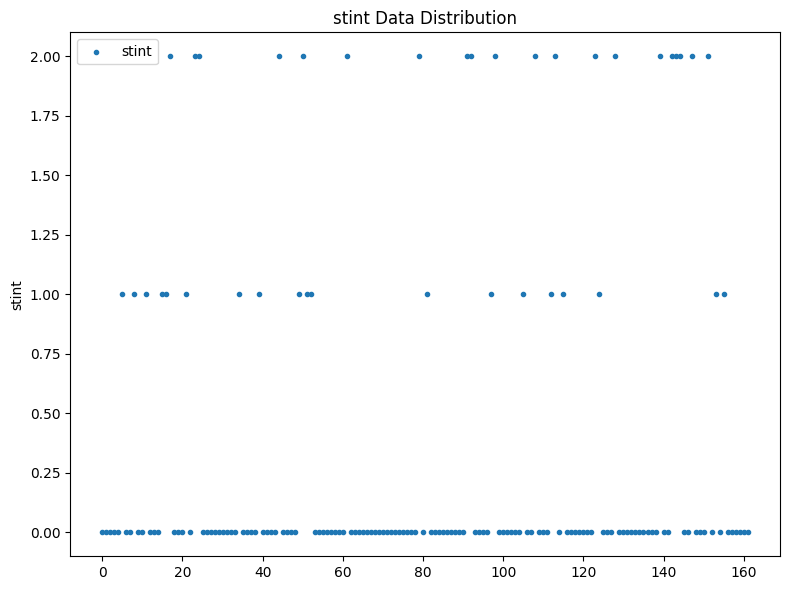

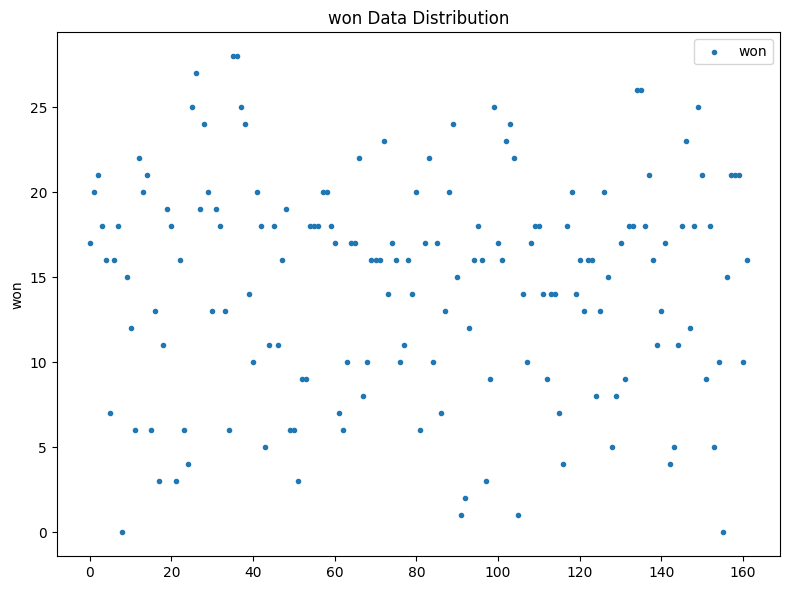

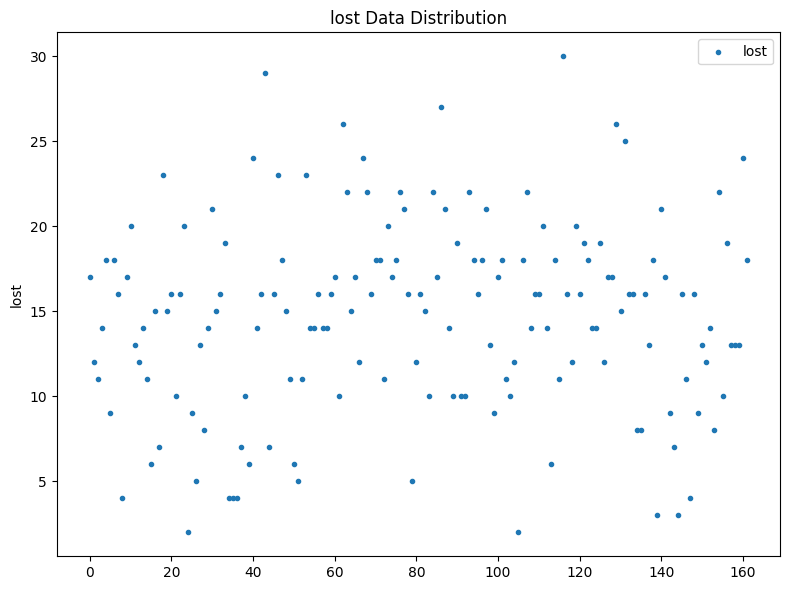

In [58]:
for column in coaches.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(coaches)), coaches[column], marker='.', label=column)
    plt.title(f'{column} Data Distribution')
    plt.ylabel(column)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [59]:
# create w/l and post w/l ratio

coaches['W/L Ratio'] = coaches['won'] / (coaches['lost'].replace(0, 1))
#coaches['Post W/L Ratio'] = coaches['post_wins'] / (coaches['post_losses'].replace(0, 1))

coaches.to_csv('dataset_edited/coaches.csv', index=False)

# Players Data Exploration and processing

In [60]:
# Players
# remove first and last season
# ignore dead players
# check for missing values and abnormal values

players = pd.read_csv("dataset/players.csv")
players.drop(columns=['firstseason', 'lastseason'], inplace=True)

In [61]:
# List of columns to ignore for missing value check
columns_to_ignore = ["college", "collegeOther"]

# Find rows with missing values in all columns except the specified ones
missing_rows = players.dropna(subset=[col for col in players.columns if col not in columns_to_ignore])

missing_rows

,bioID,pos,height,weight,college,collegeOther,birthDate,deathDate
0,abrahta01w,C,74.0,190,George Washington,NaN,1975-09-27,0000-00-00
1,abrossv01w,F,74.0,169,Connecticut,NaN,1980-07-09,0000-00-00
2,adairje01w,C,76.0,197,George Washington,NaN,1986-12-19,0000-00-00
3,adamsda01w,F-C,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19,0000-00-00
4,adamsjo01w,C,75.0,180,New Mexico,NaN,1981-05-24,0000-00-00
...,...,...,...,...,...,...,...,...
887,zarafr01w,G,70.0,146,NaN,NaN,1976-12-08,0000-00-00
888,zellosh01w,G,70.0,155,Pittsburgh,NaN,1986-08-28,0000-00-00
889,zhengha01w,C,80.0,254,NaN,NaN,1967-03-07,0000-00-00
891,zirkozu01w,G,69.0,145,NaN,NaN,1980-06-06,0000-00-00


In [62]:
# remove dead player data
players_filtered = missing_rows[players['deathDate'] == '0000-00-00']
players_filtered.reset_index(drop=True, inplace=True)

players_filtered.drop(columns=['deathDate'], inplace=True)

players_filtered

/tmp/ipykernel_6790/1405372757.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  players_filtered = missing_rows[players['deathDate'] == '0000-00-00']
/tmp/ipykernel_6790/1405372757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_filtered.drop(columns=['deathDate'], inplace=True)


,bioID,pos,height,weight,college,collegeOther,birthDate
0,abrahta01w,C,74.0,190,George Washington,NaN,1975-09-27
1,abrossv01w,F,74.0,169,Connecticut,NaN,1980-07-09
2,adairje01w,C,76.0,197,George Washington,NaN,1986-12-19
3,adamsda01w,F-C,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19
4,adamsjo01w,C,75.0,180,New Mexico,NaN,1981-05-24
...,...,...,...,...,...,...,...
806,zarafr01w,G,70.0,146,NaN,NaN,1976-12-08
807,zellosh01w,G,70.0,155,Pittsburgh,NaN,1986-08-28
808,zhengha01w,C,80.0,254,NaN,NaN,1967-03-07
809,zirkozu01w,G,69.0,145,NaN,NaN,1980-06-06


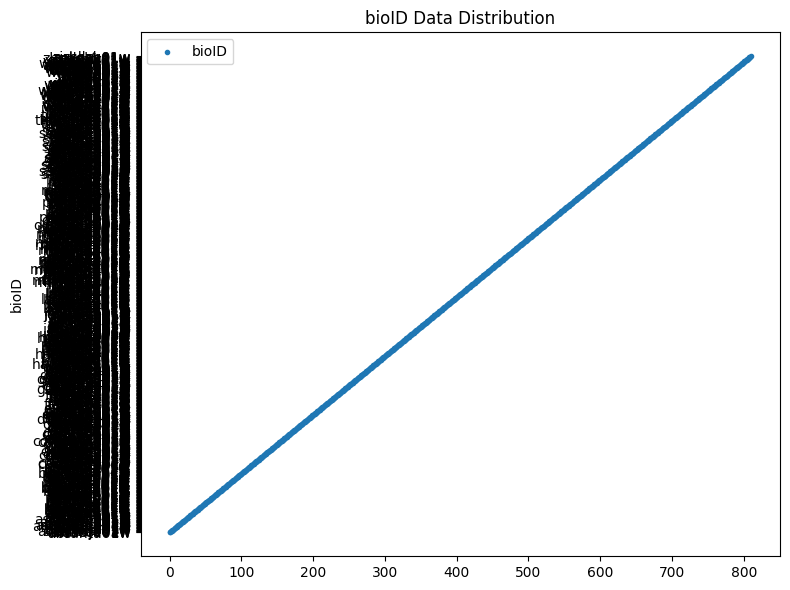

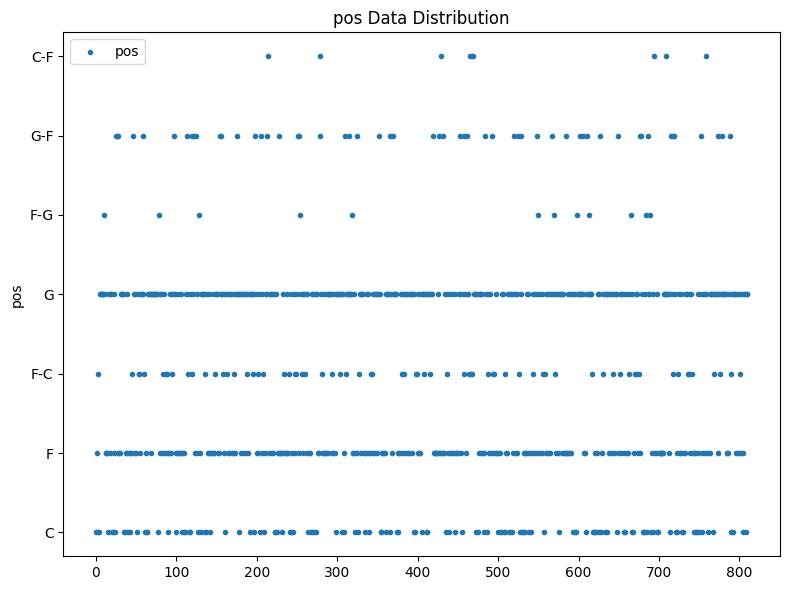

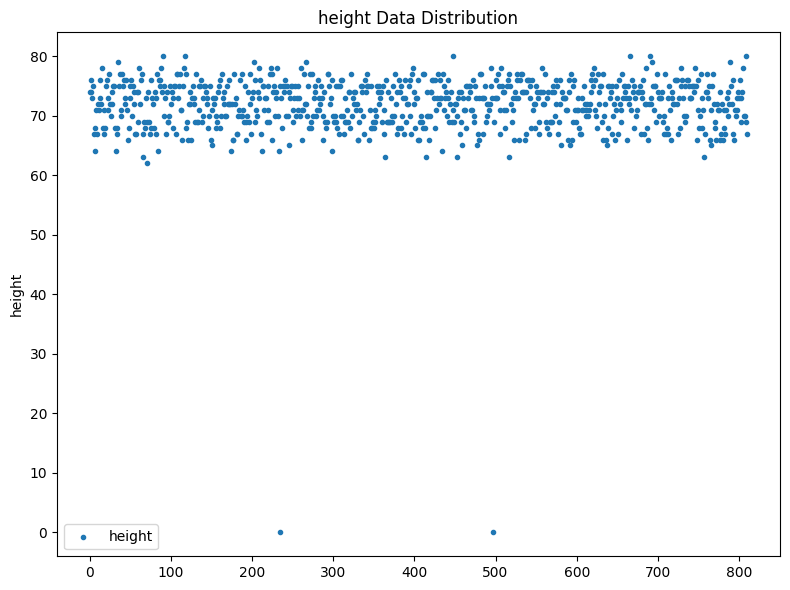

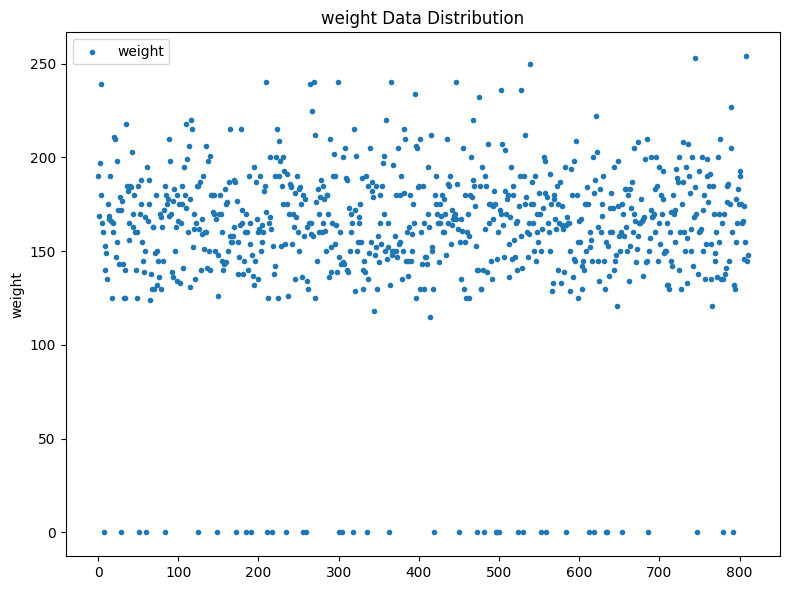

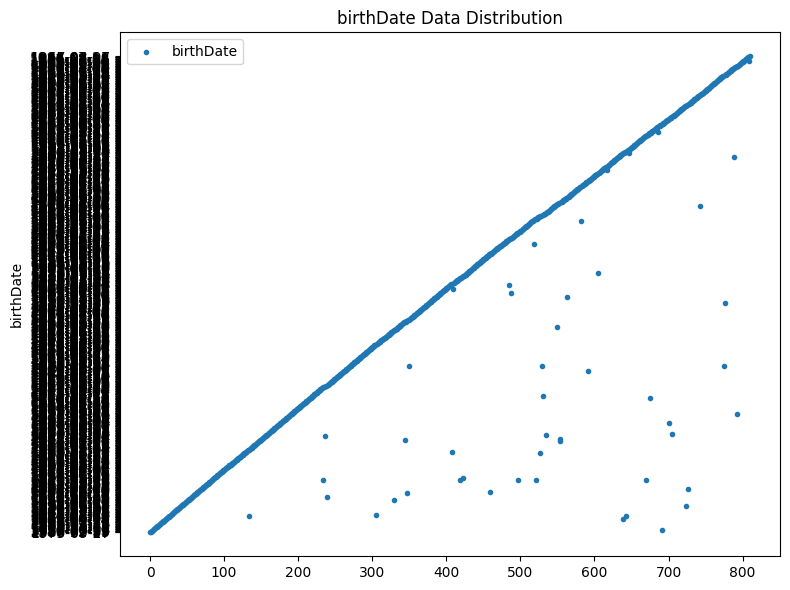

In [63]:
columns_filtered = [col for col in players_filtered.columns if col not in columns_to_ignore]
for column in columns_filtered:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(players_filtered)), players_filtered[column], marker='.', label=column)
    plt.title(f'{column} Data Distribution')
    plt.ylabel(column)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [64]:
# remove rows with birthdate 0000-00-00

players = players_filtered
players = players[players['birthDate'] != '0000-00-00']
players.reset_index(drop=True, inplace=True)

In [65]:
# remove abnormal heights

players = players[players['height'] >= 50]

players.reset_index(drop=True, inplace=True)

In [66]:
# remove abnormal weight

players = players[players['weight'] >= 50]

players.reset_index(drop=True, inplace=True)

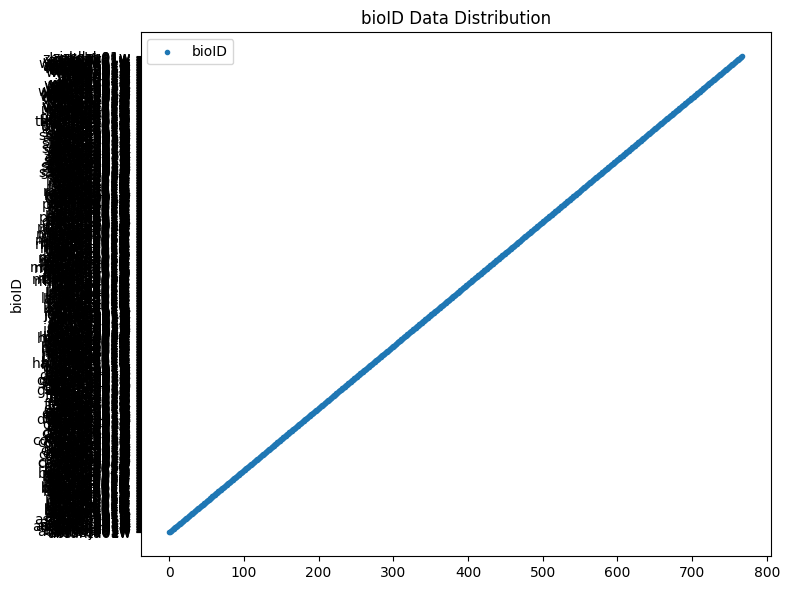

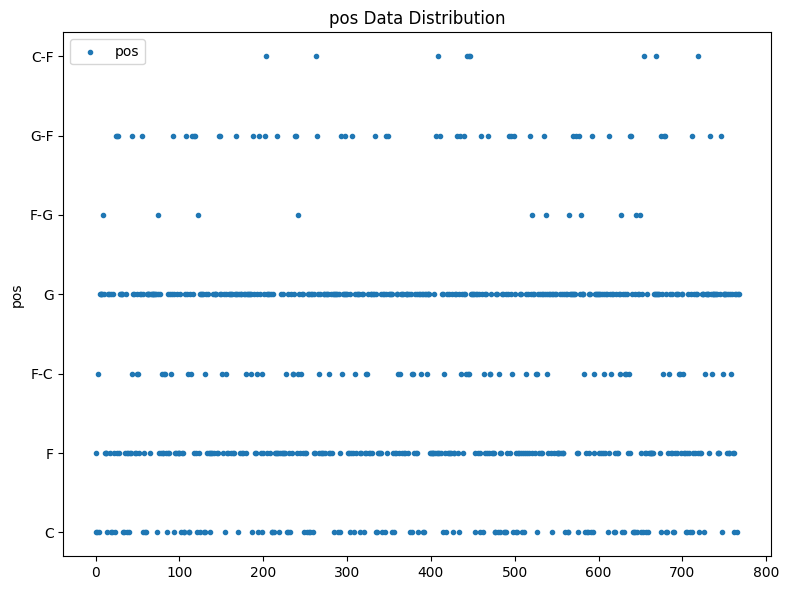

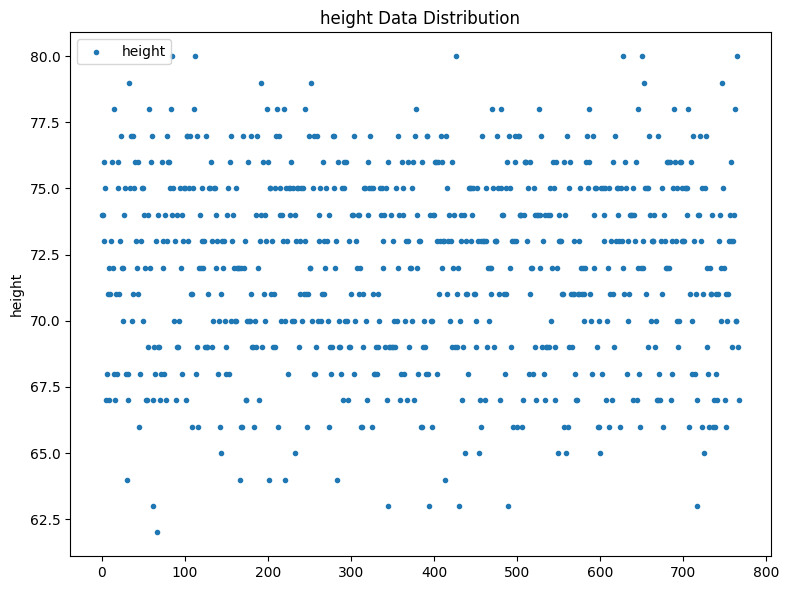

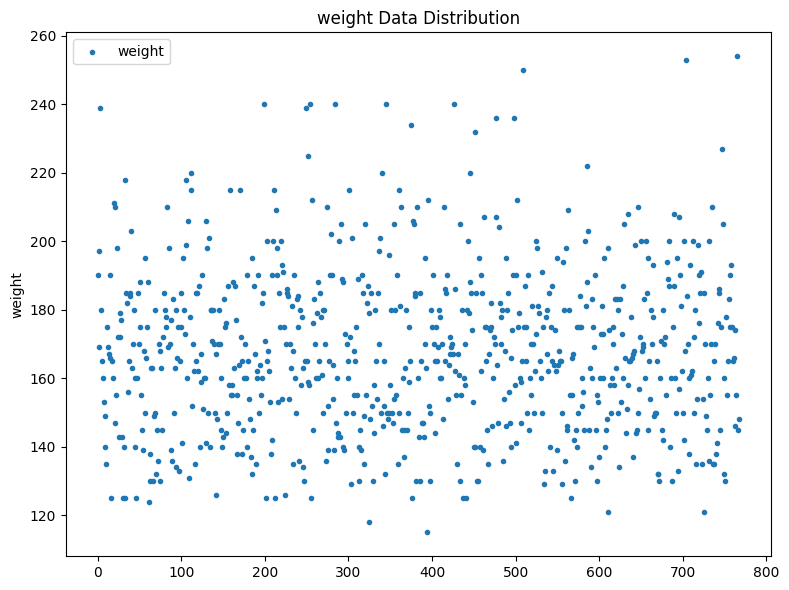

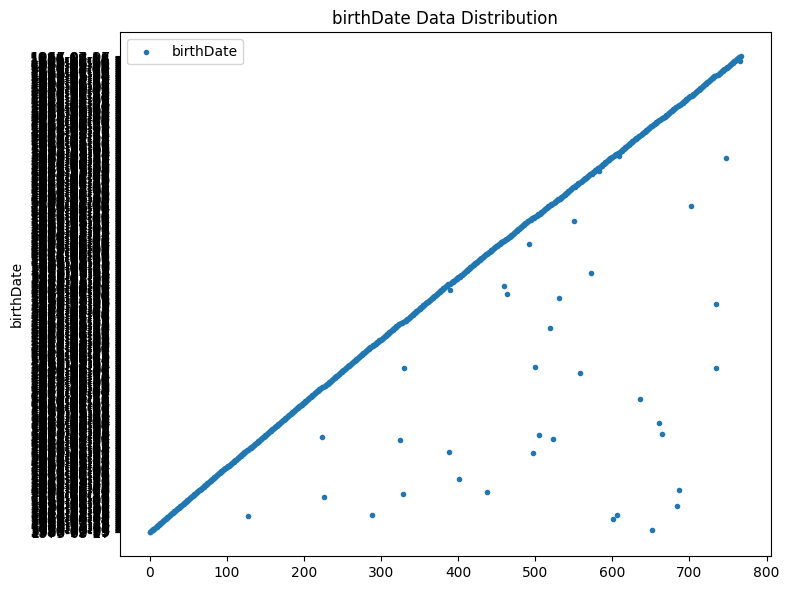

In [67]:
columns_filtered = [col for col in players.columns if col not in columns_to_ignore]
for column in columns_filtered:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(players)), players[column], marker='.', label=column)
    plt.title(f'{column} Data Distribution')
    plt.ylabel(column)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [68]:
players.to_csv("dataset_edited/players.csv", index=False)
players

,bioID,pos,height,weight,college,collegeOther,birthDate
0,abrahta01w,C,74.0,190,George Washington,NaN,1975-09-27
1,abrossv01w,F,74.0,169,Connecticut,NaN,1980-07-09
2,adairje01w,C,76.0,197,George Washington,NaN,1986-12-19
3,adamsda01w,F-C,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19
4,adamsjo01w,C,75.0,180,New Mexico,NaN,1981-05-24
...,...,...,...,...,...,...,...
763,zarafr01w,G,70.0,146,NaN,NaN,1976-12-08
764,zellosh01w,G,70.0,155,Pittsburgh,NaN,1986-08-28
765,zhengha01w,C,80.0,254,NaN,NaN,1967-03-07
766,zirkozu01w,G,69.0,145,NaN,NaN,1980-06-06


In [69]:
teams_dataset = pd.read_csv("dataset/teams.csv")

def merge_column(row):
    if pd.isna(row['firstRound']) and pd.isna(row['semis']) and pd.isna(row['finals']):
        return 'label0'
    elif row['firstRound'] == 'L' and pd.isna(row['semis']) and pd.isna(row['finals']):
        return 'label1'
    elif row['firstRound'] == 'W' and row['semis'] == 'L' and pd.isna(row['finals']):
        return 'label2'
    elif row['firstRound'] == 'W' and row['semis'] == 'W' and row['finals'] == 'L':
        return 'label3'
    elif row['firstRound'] == 'W' and row['semis'] == 'W' and row['finals'] == 'W':
        return 'label4'
    else:
        return 'Unknown'
    
def merge_to_ratio(row):
    return round(row['won'] / row['GP'], 3)

def home_win_ratio(row):
    return round(row['homeW']/(row['homeW'] + row['homeL']), 3)

def away_win_ratio(row):
    return round(row['awayW']/(row['awayW'] + row['awayL']), 3)

teams_dataset.drop(['lgID', 'franchID', 'divID', 'seeded', 'name', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmTRB', 'confL', 'confW', 'attend', 'arena'], axis = 1, inplace=True)
teams_dataset.rename(columns={'rank' : 'seed'}, inplace=True)
    
column_data = teams_dataset.apply(merge_column, axis=1)
teams_dataset.insert(4, 'results', column_data)
teams_dataset.drop(['firstRound', 'semis', 'finals'], axis=1, inplace = True)

column_data = teams_dataset.apply(merge_to_ratio, axis=1)
teams_dataset.insert(37, 'win_ratio', column_data)
teams_dataset.drop(['won', 'lost', 'GP'], axis=1, inplace=True)

column_data = teams_dataset.apply(home_win_ratio, axis=1)
teams_dataset.insert(38, 'homeW_ratio', column_data)
teams_dataset.drop(['homeW', 'homeL'], axis=1, inplace=True)

column_data = teams_dataset.apply(away_win_ratio, axis=1)
teams_dataset.insert(39, 'awayW_ratio', column_data)
teams_dataset.drop(['awayW', 'awayL'], axis=1, inplace=True)

In [70]:
seriesPost_dataset = pd.read_csv('dataset/series_post.csv')
seriesPost_dataset.drop(['lgIDWinner', 'lgIDLoser'], axis=1, inplace=True)

teams_dataset.to_csv('dataset_edited/teams.csv', index=False)
seriesPost_dataset.to_csv('dataset_edited/series_post.csv', index=False)